# Wstępna analiza baz danych
W tej pracy domowej wypiszę obserwacje na temat 2 baz danych ze zdjęciami

## Pierwsza baza danych
Jako pierwszą opiszę bazę danych przeznaczoną do segmentacji. Dotyczyła ona tomografii komputerowej pacjentów. Baza składała się z 2 części - pacjentów z pozytywnym i negatywnym wynikiem testu na koronawirusa. Do każdej z części została dodana tabela informująca o danych pacjenta. Dodatkowo do jednej otrzymaliśmy annotacje

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
positive=pd.read_excel('positive.xlsx')
negative=pd.read_excel('negative.xlsx')

In [3]:
negative.head()

,Anon MRN,Anon Age,Anon Study Date,Anon Exam Description,Anon Sex,Anon Study UID,Anon Image Count,Modality,Symptomatic,Result,Specimen Source
0,419639-000340,59.93,2005-01-18,CT CHEST HIGH RESOLUTION,F,1.2.826.0.1.3680043.10.474.419639.209133109710...,216,CT,YES,NOT DETECTED,Nasopharyngeal Swab
1,419639-000350,77.46,2006-02-09,CT CHEST WITHOUT CONTRAST,F,1.2.826.0.1.3680043.10.474.419639.856628220559...,225,CT,YES,NOT DETECTED,Nasopharyngeal Swab
2,419639-000425,78.10,2002-05-28,CT CHEST WITHOUT CONTRAST,M,1.2.826.0.1.3680043.10.474.419639.167137291084...,251,CT,YES,NOT DETECTED,Nasopharyngeal Swab
3,419639-000474,67.47,2009-03-30,CT CHEST PULMONARY EMBOLISM (CTPE),M,1.2.826.0.1.3680043.10.474.419639.142013724682...,241,CT,YES,NOT DETECTED,Pooled NP/OP Swab
4,419639-000485,35.53,2002-10-19,CT CHEST WITH CONTRAST,M,1.2.826.0.1.3680043.10.474.419639.112773344213...,205,CT,YES,NOT DETECTED,Nasopharyngeal Swab


In [4]:
positive.head()

,Anon MRN,Anon Age,AnonTCIA Study Date,Anon Exam Description,Anon Sex,Anon Study UID,Anon Image Count,Modality,Result,Specimen Source
0,419639-000082,84.84,2002-08-02,CT CHEST WITHOUT CONTRAST,F,1.2.826.0.1.3680043.10.474.419639.312580455409...,1226,CT,DETECTED,Pooled NP/OP Swab
1,419639-000361,50.61,2002-10-21,CT CHEST WITHOUT CONTRAST,F,1.2.826.0.1.3680043.10.474.419639.426473907903...,1139,CT,DETECTED,Nasopharyngeal Swab
2,419639-000421,63.41,2006-12-05,CT CHEST WITHOUT CONTRAST,M,1.2.826.0.1.3680043.10.474.419639.308001698749...,965,CT,DETECTED,Nasopharyngeal Swab
3,419639-000582,63.93,2002-12-06,CT CHEST WITH CONTRAST,M,1.2.826.0.1.3680043.10.474.419639.317104088349...,1141,CT,DETECTED,Pooled NP/OP Swab
4,419639-000800,48.25,2005-05-11,CT CHEST WITHOUT CONTRAST,F,1.2.826.0.1.3680043.10.474.419639.119157449661...,1079,CT,DETECTED,NaN


Obie ramki mają podobną strukturę. Różnią się pojedynczymi kolumnami oraz ich nazwami. Kolumnami, które zawierają ważne informacje to: `Anon Age`, `Anon Sex`, `Anon Image Count`. 

In [5]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Anon MRN               120 non-null    object        
 1   Anon Age               120 non-null    float64       
 2   Anon Study Date        120 non-null    datetime64[ns]
 3   Anon Exam Description  120 non-null    object        
 4   Anon Sex               120 non-null    object        
 5   Anon Study UID         120 non-null    object        
 6   Anon Image Count       120 non-null    int64         
 7   Modality               120 non-null    object        
 8   Symptomatic            30 non-null     object        
 9   Result                 120 non-null    object        
 10  Specimen Source        30 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 10.4+ KB


W obu ramkach otrzymujemy dostęp do danych 120 pacjentów (120 z wynikiem negatywnym i 120 z wynikiem pozytywnym). Nie jest to duża liczba, lecz do stworzenia modelu 3d potrzeba dla każdej osoby nawet kilkuset zdjęć.

In [6]:
positive.describe()

,Anon Age,Anon Image Count
count,120.000000,120.000000
mean,57.441417,265.466667
std,15.562424,322.885414
min,17.000000,80.000000
25%,46.750000,108.000000
50%,58.000000,125.000000
75%,68.000000,219.750000
max,90.000000,1255.000000


Badanie zostało przeprowadzone na osobach od 17 do 90 lat.
Średnia eyniosła 57,4 lat, a więc badane były głównie osoby starsze. Nie dziwi nas to, ponieważ większość zachorowań na Covid to starsi ludzie. <br>
Widzimy również, że średnio zostało zrobionych 265 zdjęć jednej osobie. Jednak dla 75% wszystkich badanych wystarczyło 220 zdjęć. Zastanawia maksymalna liczba 1255 wykonanych zdjęć.  

In [7]:
negative.describe()

,Anon Age,Anon Image Count
count,120.000000,120.000000
mean,51.207750,176.833333
std,18.413987,79.085884
min,20.000000,27.000000
25%,35.000000,106.000000
50%,55.000000,199.000000
75%,65.000000,241.000000
max,90.000000,564.000000


Wiek badanych od 20 do 90 lat. Tym razem niższa średnia 51 lat, ale nadal jest to grupa głównie starszych ludzi. Jeżeli porównamy sobie wyniki z ramki `positive` i `negative`, obserwujemy duże podobieństwa. Jedną poważną różnicę widzimy w wynikach dotyczącyh pierwszego kwartyla wieku. Być może trzeba to dokładniej sprawdzić, ponieważ z kolejnych kwartyli dostajemy zbliżone wyniki.

In [8]:
positive["Anon Sex"].value_counts()

M    76
F    44
Name: Anon Sex, dtype: int64

In [9]:
negative["Anon Sex"].value_counts()

F    63
M    57
Name: Anon Sex, dtype: int64

Kolejną sprawdzoną przeze mnie kolumną był rozkład płci badanych. Wśród pozytywnych wyników mamy zdecydowaną przewagę mężczyzn. Jeżeli chodzi o negatywne wyniki otrzymaliśmy podobną liczbę kobiet i mężczyzn. Podatność na Covid nie jest zależna od płci, więc nawet duża przewaga mężczyzn wśród pozytywnych wyników o niczym nie świadczy i nie powinno mieć wpływu na przyszły model.

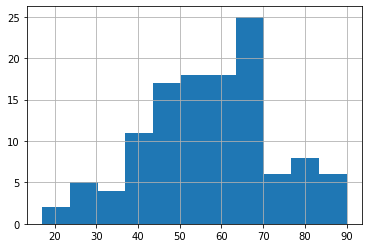

In [10]:
positive["Anon Age"].hist(bins=11 )

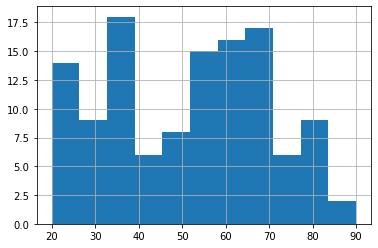

In [11]:
negative["Anon Age"].hist(bins=11 )

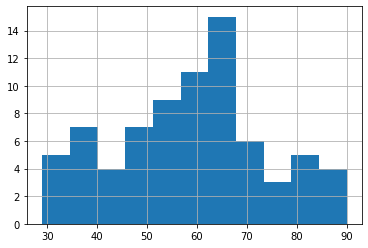

In [12]:
positive["Anon Age"].where(positive["Anon Sex"]=="M").hist(bins=11 )

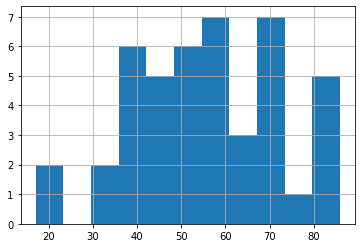

In [13]:
positive["Anon Age"].where(positive["Anon Sex"]=="F").hist(bins=11 )

Patrząc na kilka wygenerowanych histogramów podsumowujących częśc związaną z płcią i wiekiem, możemy potwierdzić wnioski i wątpliwości.<br>
- Badanie głównie dla starszych osób<br>
- Podejrzanie dużo młodych ludzi w ramce z negatywnymi wynikami
- Różnica w rozkładach płci nieznaczna i niezbyt istotna

## Symptomy
W ramce z negatywnymi wynikami jest kolumna, informująca, czy osoba miała symptomy wirusa. 30 osób zostało oznaczonych jako posiadające podejrzenie Covida.

In [14]:
tmp=negative[negative["Symptomatic"]=="YES"]
tmp.describe()

,Anon Age,Anon Image Count
count,30.000000,30.000000
mean,62.297667,261.233333
std,17.027336,61.992037
min,24.970000,204.000000
25%,56.237500,238.000000
50%,66.055000,252.500000
75%,77.042500,267.250000
max,90.000000,564.000000


(array([2., 2., 2., 1., 1., 6., 6., 2., 7., 1.]),
 array([24.97 , 31.473, 37.976, 44.479, 50.982, 57.485, 63.988, 70.491,
        76.994, 83.497, 90.   ]),
 <a list of 10 Patch objects>)

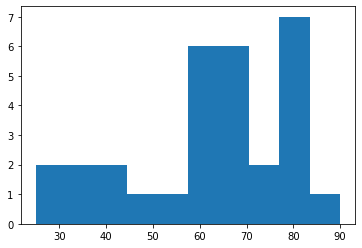

In [15]:
plt.hist(tmp["Anon Age"])

Zgodnie z podejrzeniami śrenia wieku wzrosła do 62 lat. Automatycznie wzrósł wynik dla pierwszego kwartyla wieku. Zwiększyła się również liczba wykonywanych zdjęć. Może być to później problemem, jeżeli model będzie się uczył, że im więcej zdjęć tym większe szanse na pozytywny wynik testu na wirusa.

## Dodatkowe wykresy i obserwacje

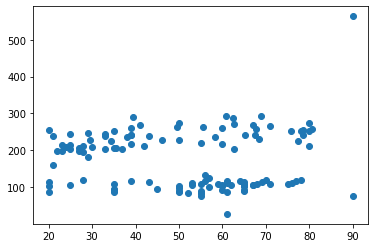

In [16]:
plt.scatter(negative['Anon Age'],negative["Anon Image Count"])

Na wykresie widzimy, że pacjenci zostali podzieleni na dwie grupy. Różnica w liczbie wykonanych zdjęć między grupami to około 100. Widać, że nie tylko osoby oznaczone jako podejrzane miały zrobione więcej zdjęć. Znowu można podejrzewać, że taki rozkład będzie problemem w przyszłym procesie nauczania.

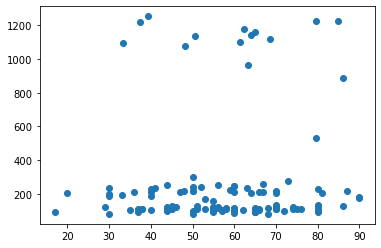

In [17]:
plt.scatter(positive['Anon Age'],positive["Anon Image Count"])

Wśród osób z pozytywnym wynikiem testu obserwujemy 3 grupy. Pierwsze są takie same jak na poprzednim wykresie. 3 grupa to osoby, którym wykonano znacząco więcej zdjęć niż pozostałym. Jest to kolejna zastanawiająca obserwacja. Dlaczego niektórym wystarczyło zrobic 200 zdjęć a u innych to ponad 1000. 

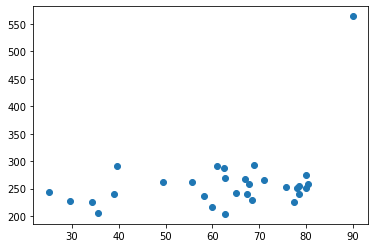

In [18]:
plt.scatter(tmp['Anon Age'],tmp["Anon Image Count"])

U osób z symptomami nie widzimy dużego rozrzutu w liczbie wykonanych zdjęć.

## Annotacje

In [19]:
annotations=pd.read_excel('annotacje.xlsx')

In [20]:
annotations.head()

,Unnamed: 0,id,parentId,isImported,createdAt,createdById,updatedAt,updatedById,labelId,annotationNumber,...,groupName,annotationMode,color,description,labelName,radlexTagIdsLabel,scope,parentLabelId,datasetId,number
0,0,A_bG1ryk,NaN,False,2020-07-10T20:13:56.883Z,U_2vzj7v,2020-07-10T20:14:02.176Z,U_2vzj7v,L_neeyDn,7.0,...,Purple Group 1,freeform,#e65100,NaN,Infectious opacity,[],INSTANCE,NaN,D_q24k8z,94
1,1,A_qmVy5W,NaN,False,2020-07-10T20:16:32.402Z,U_2vzj7v,2020-07-10T20:16:35.274Z,U_2vzj7v,L_neeyDn,7.0,...,Purple Group 1,freeform,#e65100,NaN,Infectious opacity,[],INSTANCE,NaN,D_q24k8z,94
2,2,A_Y6R9L9,NaN,False,2020-07-10T20:09:32.536Z,U_2vzj7v,2020-07-10T20:09:48.824Z,U_2vzj7v,L_neeyDn,1.0,...,Purple Group 1,freeform,#e65100,NaN,Infectious opacity,[],INSTANCE,NaN,D_q24k8z,94
3,3,A_b4l90m,NaN,False,2020-07-10T20:20:02.306Z,U_2vzj7v,2020-07-10T20:20:07.813Z,U_2vzj7v,L_neeyDn,2.0,...,Purple Group 1,freeform,#e65100,NaN,Infectious opacity,[],INSTANCE,NaN,D_q24k8z,94
4,4,A_qBMAXz,NaN,False,2020-07-10T20:11:13.199Z,U_2vzj7v,2020-07-10T20:11:20.088Z,U_2vzj7v,L_neeyDn,2.0,...,Purple Group 1,freeform,#e65100,NaN,Infectious opacity,[],INSTANCE,NaN,D_q24k8z,94


In [28]:
annotations["height"].describe()

count    25605.0
mean       512.0
std          0.0
min        512.0
25%        512.0
50%        512.0
75%        512.0
max        512.0
Name: height, dtype: float64

In [29]:
annotations["width"].describe()

count    25605.000000
mean       512.215583
std          2.216331
min        512.000000
25%        512.000000
50%        512.000000
75%        512.000000
max        535.000000
Name: width, dtype: float64

W kolumnie data otrzymaliśmy miejsca, na które zostały nałożone annotacje. Dodatkowa informacja to `labelName`. Możemy odczytać jaki rodzaj schorzenia został zdiagnozowany. Kolumna `createdAt` informuje, że annotacje zostały naniesione w lipcu i sierpniu 2020 roku, czyli na początku pandemii. Wszystkie zdjęcia mają rozmiar 512x512.

## Maski

Jako dodatek spróbowałem nałożyć maski na niektóre zdjęcia. 

In [21]:
%matplotlib inline

import numpy as np

import os
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
init_notebook_mode(connected=True) 

In [22]:
import pydicom
import gdcm
from  scipy import ndimage

In [23]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

In [24]:
def remove_noise(file_path, display=True):
    medical_image = pydicom.read_file(file_path)
    image = medical_image.pixel_array
    
    hu_image = transform_to_hu(medical_image, image)
    brain_image = window_image(hu_image, 40, 80) #bone windowing
    
    segmentation = morphology.dilation(brain_image, np.ones((1, 1)))
    labels, label_nb = ndimage.label(segmentation)
    
    label_count = np.bincount(labels.ravel().astype(np.int))
    label_count[0] = 0

    mask = labels == label_count.argmax()
 
    mask = morphology.dilation(mask, np.ones((1, 1)))
    mask = scipy.ndimage.morphology.binary_fill_holes(mask)
    mask = morphology.dilation(mask, np.ones((3, 3)))
    masked_image = mask * brain_image
    return masked_image

In [25]:
Path="D:/piotr/4 semestr/Warsztaty/negative/MIDRC-RICORD-1B/MIDRC-RICORD-1B-419639-000340/01-18-2005-NA-CT CHEST HIGH RESOLUTION-06379/2.000000-SUPINE CHEST RECON 12-09859/"

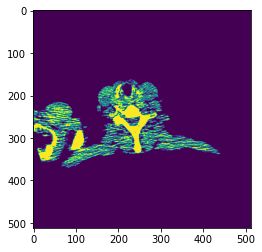

In [34]:
 plt.imshow(remove_noise(Path+("1-001.dcm")))

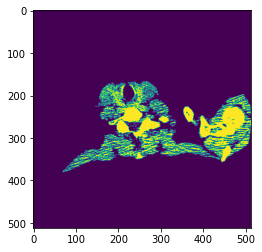

In [30]:
for i in range(1,10):
    plt.imshow(remove_noise(Path+("1-00{}.dcm").format(i)))
    plt.savefig('D:/piotr/4 semestr/Warsztaty/maski/maska{}.png'.format(i))

## Metadane ze zdjęć dicom

Na koniec sprawdziłem, czy z samych zdjęć możemy otrzymać jakieś metadane.

In [35]:
ds = pydicom.filereader.dcmread(Path+"/1-002.dcm")
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.419639.132329111742110432980320658421
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID

Otrzymaliśmy dużo informacji, lecz wszystki interesujące (wiek, płeć) zostały zawarte w dołączonych ramkach danych. Pozostałe obserwacji są dla mnie niejasne.

## Druga baza danych

W drugim zbiorze danych znajdują się zdjęcia pacjentów z zapaleniem płuc. Zbiór został podzielony na 3 części: treningową, testową i walidacyjnym. Może zastanawiać liczba zdjęć w części walidacyjnej, gdyż jest ich nieproporcjonalnie mało. W części treningowej i testowej mamy 2 podzbiory: zdjęcia z zapaleniem płuc i bez. Niestety do bazy nie dostała dołączona tabela z danymi pacjentów ani żadne dodatkowe informacje. Obrazy nie zawierają żdanych dodatkowych metadanych.Z tego powodu ciężko było mi wyciągnąć jakiekolwiek wnioski.